<a href="https://colab.research.google.com/github/NihalSidhu/Stacking-Players/blob/main/StackingPlayersStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Is Stacking Players an Effective Strategy?

# Table of Contents
- Introduction to Stacking in Fantasy Football
- What is Value Over Replacement (VOR)?
- The Problem Statement
- Data Collection
- Data Processing
- Model Development
- Deploying the Model
- Model Insights
- Conclusion

## Introduction to Stacking in Fantasy Football

When playing fantasy football, an owner will start a set of players stemming from different teams in the NFL. Every Sunday, the owner will have to follow and pay attention to different players across many different teams, which always makes for a fun Sunday. Occasionally, an owner might start two players from the same team, which is better known as "stacking". Two or more players can be stacked from the same team, tying some of your fantasy football score with the team's success. When you stack multiple players from one team, you are hoping that one player's big game leads to his teammate having a big game as well, which would ultimately increase your total score.


When an owner stacks two players, their fantasy team's outputs becomes more dependent on that NFL team's performance that week. With stacking, you take on more risk because if that respective NFL team plays poorly that week, then both players would have low fantasy outputs. Similar to a portfolio management, diversifying your players can reduce risk, but having multiple players from the same team can simutaneously increase your risk and score potential.

When utilizing the stack strategy, we should acknowledge it as a high risk, high reward gameplan. The stack strategy should predominantly be used when you are the underdog and need to score a large number of points. For example, if you are in a week where your team is projected significantly less than your opponent, it might make to stack your starters so that you get the extra boost that week. In this example, if you were to stack your QB and WR and a touchdown was thrown to your WR, you would get 6 points from your WR and 4 points from your QB, giving you a large 10 point swing in your matchup. By stacking, you are hoping that the team that your two players belong to does really well and is able to score more points than normal. When you are the underdog, it makes more sense to take on more risk in order to help your chances.

## The Big Question

We have discussed the concept of stacking players in a lineup and how it can be beneficial in fantasy football. However, we haven't looked into which two positions to actually stack with one another in the lineup. Does it make sense to just start two random positions together? Or are there optimal combinations of positions to aim for? That is what I will be looking into within this study where we will try to understand the big question: **Which positions should be stacked with one another in a starting lineup?**

We will look to solve this question by understanding which positions' fantasy scores are correlated across all 32 NFL teams. Lets dive into the data.

## Data Collection

First I will be pulling the weekly data from ESPN that is formatted in a csv file. With this data, we will be able to find fantasy scores of players on a week by week basis. We will then be able to utilize the data to see correlations between teammates on a week by week basis across different positions.

In [1]:
# Importing key libraries to be used
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving weekly_data.csv to weekly_data.csv


In [2]:
# Reading the weekly data into a dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['weekly_data.csv']))
df.head()

,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,...,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
0,00-0019596,Tom Brady,QB,TB,1,212,305,87,1,2,...,NaN,0,NaN,NaN,NaN,0,0,10.38,10.38,10.38
1,00-0019596,Tom Brady,QB,TB,2,190,318,81,1,1,...,NaN,0,NaN,NaN,NaN,0,1,9.40,9.40,9.40
2,00-0019596,Tom Brady,QB,TB,3,271,236,124,1,3,...,NaN,0,NaN,NaN,NaN,0,0,14.74,14.74,14.74
3,00-0019596,Tom Brady,QB,TB,4,385,326,205,3,1,...,NaN,0,NaN,NaN,NaN,0,1,25.40,25.40,25.40
4,00-0019596,Tom Brady,QB,TB,5,351,356,178,1,0,...,NaN,0,NaN,NaN,NaN,0,0,19.74,19.74,19.74


Taking look at the data, we can see Tom Brady's week by week stats, including his fantasy points. This dataframe will provide us with every player's week by week stats that we can use to find correlations across relevant positions.

## Data Processing

Lets look at what positions this data consists of.

In [3]:
df['Position'].unique()

array(['QB', 'P', 'TE', 'WR', 'RB', 'ILB', 'FB', 'T', 'FS', 'SS', 'OLB',
       'CB'], dtype=object)

Since we are doing this analysis for fantasy football, we can remove all non-skill players.

In [4]:
# We want to only include relevant fantasy football positions in our dataframe
ff_positions = ['QB', 'WR', 'TE', 'RB']

df = df.loc[df['Position'].isin(ff_positions)]

# Checking if we kept the relevant positions
print(df['Position'].unique())

['QB' 'TE' 'WR' 'RB']


## Model Development

When looking at positions, we want to look for relationships between the most relevant positions on each team. This include the QB1, RB1, WR1, WR2, and TE1 for each team. In our case, WR1 refers to the wide receiver the scored the most for a team and WR2 refers to the next highest scoring WR. This would allow us to find different kinds relationships across different positions on the field.

Now lets try to determine who the QB1, RB1, WR1, WR2, and TE1 is on each team. We can determine this by first finding the average fantasy scores for each player. With that information, we would then be able to move into finding the QB1, RB1, WR1, WR2 and TE1 for each team.

In [5]:
import numpy as np

# Picking up the relevant columns needed
columns = ['Player', 'Tm', 'Position', 'Week', 'PPRFantasyPoints']

new_df = df[columns]

'''
Grouping by the rows where we are referring to the same player, team
and position. By doing this, we are able to aggregate all the fantasy
scores for each player.
'''
new_df = new_df.groupby(['Player', 'Tm', 'Position'], as_index=False).agg({
    # Calculating average fantasypoints for each player
    'PPRFantasyPoints': np.mean
})

new_df.head()

,Player,Tm,Position,PPRFantasyPoints
0,A.J. Brown,PHI,WR,16.660000
1,A.J. Dillon,GB,RB,9.858824
2,A.J. Green,ARI,WR,4.738462
3,Aaron Jones,GB,RB,14.623529
4,Aaron Rodgers,GB,QB,14.070588


We now have the average fantasy PPR points for each player for a given team, which can now allow us to determine the different positions rankings for each team.

## Deploying the Model

Although we have each player's fantasypoints per game, we actually want the players mapped to their positions, whether that be QB1, WR1, WR2 etc. Rather than look at individual players, we will want to look at each position and what each position mapping (QB1, RB1, WR1, etc) scored on each team. By looking at the scores of the position mappings, we will be able to find the correlations between the positions across all 32 teams.

Let's map the scores of the players from each team to what positions mappings they fall under. We will iterate through each team to identify the QB1, RB1, and so forth. After identifying the player mappings for every team, we will be left with a table that showcases what each position mapping averaged for every team in the NFL. In the end, we will be able to see what the QB1, RB1, WR1, WR2, and TE1 scored on average for every NFL team.

*Note: Position mappings refers to QB1, RB1, WR1, WR2 and TE1*

In [6]:
# To help us map the number of each position we want to collect
position_mappings =  {
    'QB': 1,
    'RB': 1,
    'WR': 2,
    'TE': 1
}

"""
Creating a function to help us get the fantasy points of the specific position
in the mapping. The n arguement will represent the number of scores for that
specific position we want to return. For example lets set n to 2 and pos to WR.
The nlargest function will return us the top 2 WRs of that specific team.
However, by using the .min() function, we will get the lowest score out of the
nlargest function and hence return the WR2. So in simpler terms, the n arguement
returns what level position we want.
"""

def get_specific_player_at_position(df, pos, n):

    # Locating the specific desired position
    df = df.loc[df['Position'] == pos]

    '''
    Grouping by the teams so we can get information from each team.
    Finding the largest points scored by the positions and then returning
    the lowest value out of that list. This allows you to get a WR1 or WR2.
    '''
    return df.groupby('Tm', as_index=False).apply(
        lambda x: x.nlargest(n, ['PPRFantasyPoints']).min()
    )

# Creating new dataframe to collect data
corr_df = pd.DataFrame(columns=columns)

"""
Here we are actually applying the function from above. We are applying the
function for each position in order to get a table with all the positions and
the points scored by each position across all 32 teams
"""

# Iterating through position map and utilizing the position and number desired
for pos, n_spots in position_mappings.items():

    # Looping through the total we want from each position (Either 1 or 2)
    for n in range(1, n_spots + 1):

        # Collecting the specific totals for each position from each team
        pos_df = get_specific_player_at_position(new_df, pos, n)
        pos_df = pos_df.rename({'PPRFantasyPoints': f'{pos}{n}'}, axis=1)

        # Creating the correlation dataframe. Adding the points data.
        corr_df = pd.concat([corr_df, pos_df], axis=1)

# Removing all NA values
corr_df = corr_df.dropna(axis=1)

# Returning only the point totals and associated positions.
corr_df = corr_df.drop(['Position', 'Player', 'Tm'], axis=1)

corr_df.head(32)

,QB1,RB1,WR1,WR2,TE1
0,18.229091,15.400000,16.855556,13.000000,11.560000
1,15.120000,11.900000,10.505882,6.875000,7.560000
2,19.673333,11.300000,8.916667,8.292857,12.675000
3,24.155556,10.772222,19.027778,11.782353,9.305882
4,14.386667,19.666667,11.711765,7.520000,3.885714
5,19.732000,11.106250,9.227273,4.657143,8.664706
6,21.396842,16.164706,19.780000,15.100000,8.531250
7,14.263333,16.552941,14.470588,9.829412,10.142857
8,17.545714,14.777778,17.931579,7.562500,10.876471
9,15.050667,11.725000,13.613333,10.626667,8.610000


As seen above, we now have a table that consists of the averages for each position mapping across the 32 teams in the NFL. In the case of our study, we removed team names because they don't provide value in understanding the stacking. The only key information we want is the position mapping and the average they scored. This will allow us to find the correlation between two positions from the same team, across all 32 teams.




Just as a precursor explanation, correlation is the measure of strength of the relationship between two variables. Correlation numbers are normalized between -1 and 1 and are considered a function of covariance. Values between 0 and 1 showcase a positive correlation, which means that when one variable goes up, the other variable goes up as well. Values between 0 and -1 indicate negative correlation which means that when one variable goes up, the other goes down. A value of 0 indicates no correlation. The greater the value, the greater the correlation.

In order to get the correlations for each pair of positions, we have to use a correlation matrix. A correlation matrix will show us correlations between each pair of variables (the position mappings) in the dataset. This will allow us to parse through the 32 teams and find the correlation between each pairing of positions across the entirety of the NFL.


Let's create a correlation matrix now based on the position mappings.

In [7]:
corr_df.corr()

,QB1,RB1,WR1,WR2,TE1
QB1,1.000000,-0.250328,0.152073,0.350165,0.419420
RB1,-0.250328,1.000000,-0.079574,0.017388,-0.127167
WR1,0.152073,-0.079574,1.000000,0.434057,0.149520
WR2,0.350165,0.017388,0.434057,1.000000,0.063123
TE1,0.419420,-0.127167,0.149520,0.063123,1.000000


With the table above, we now have a correlation matrix of our relevant positions. The way to read this is to look at a row title and a column title find the cordinates of the two positions together. That cell will represent what the correlation is between the two positions. At an initial glance, we can see that there is a large correlation between the WR1 and WR2 (0.43).

## Model Insights

The correlation matrix provides us key information, but it is a bit hard to read. Let's visualize this table so that it's easier to understand

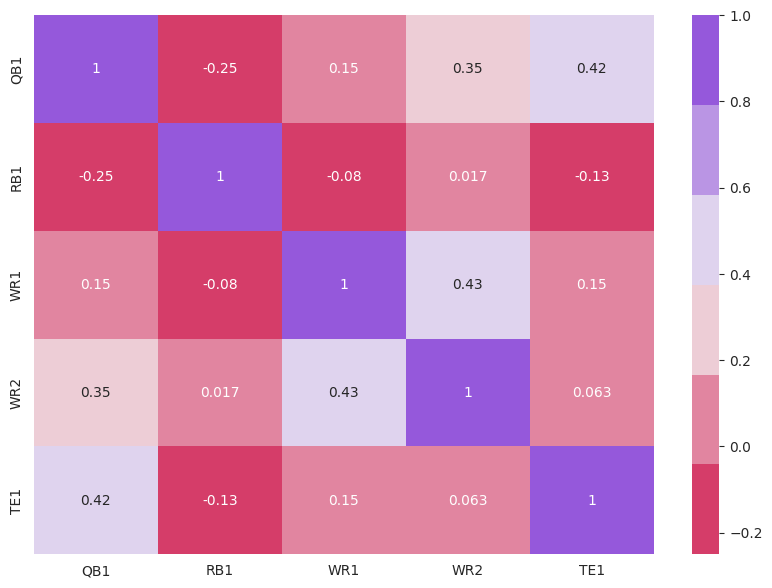

In [8]:
# Importing libraries to allow for charting/graphing
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid');

# Creating a heatmap of the positions correlations
plt.figure(figsize=(10, 7))
sns.heatmap(corr_df.corr(), annot=True, cmap=sns.diverging_palette(0, 1000));

With this correlation heat map, we are able to see the correlations between two positions more easily. In the above heatmap, we want to focus on cells with the greatest positive correlations (more purple colored). This would indicate to us that one position's positive outcomes is more likely to increase its pair position's outcomes. A greater positive correlation between two positions would indicate they are better to stack with one another because one position's increase in fantasy points is likely to lead to the pair position's increase as well.


Just by viewing the heatmap we can see a few positive correlations that could lead to stacking. They include:


*   WR1 and WR2: Positive correlation of 0.43 indicates that stacking a team's two best receivers is beneficial. We might want to start the two wide receivers from the same team and bet one one of them doing well, which would likely lead to the other receiver to do well too.

*   QB1 and TE1: Positive correlation of 0.42 indicates that stacking a QB and TE is beneficial. We might want to start the same quarterback and tight end from the same team and bet on one of them doing well, which would likely lead to the other position to score more points as well.

Although these correlations aren't very strong (not above 0.75), they can still be helpful in our decision making. These correlation numbers allow us to sway our decision making to potentially stack the WR1 | WR2 together or the QB1 | TE1 together to increase our risk, but to also increase our potential total. There isn't a strong correlation within both of these pairings, but there is enough correlation for us to at least partially benefit from these stackings. While these stackings could be beneficial to us, we can also see that there are pairings that might benefit from NOT stacking.

When looking at the heatmap, we can see one large negative correlation, which is between the QB1 and RB1. The negative correlation between these two positions is -0.25. Although this is a rather weak correlation, it at least points us to beware of the potential situation where a QB performs poorly and hence so does his runningback and vice versa. As a suggested advice, it might be a better idea to NOT start the quarterback and runningback that are from the same team.

## Conclusion

Hopefully this analysis gave you some insights to help you make decisions when deciding who you should draft and who you should start each week. Although there were no correlations that were strong (greater than 0.75 or less than -0.75), we can still take useful insights from the analysis.


Initially, our question was **which positions should be stacked with one another in a starting lineup?** To answer this question, it is somewhat beneficial to stack the WR1 and WR2 together, along with stacking the QB1 and TE1 together. So in the case where you are unsure to draft or start a WR, go with the player that allows you to stack with another WR. Similarly, if you are unsure between two QBs or two TEs, go with the players that would allow you to stack with the same tight end or quarterback on their team. As mentioned previously, the correlations for these two pairings are rather low, but nonetheless they can be helpful. They can assist us in making lineup decisions when we need to pull off an upset and they can help us decide between two players during a draft.

As mentioned earlier as well, it might also be better to keep the QB and RB1 from separate teams. Although it was a low negative correlation, it at least  points us to stray away from a QB and RB1 from the same team. From a logic point of view this makes sense because a quarterback gets his points from throwing touchdowns and runningbacks get their touchdowns separately by rushing the ball. There isn't overlap like with a QB1 and TE1 where there might be a 10 point touchdown throw/catch swing. Nonetheless, feel free to start a QB1 and RB1 from the same team (at your own risk).

I hope this study helped you understand the value of stacking and how you can leverage it throughout the season. Remember, if you are the underdog in a matchup, it might be worth stacking the WR1 & WR2 or the QB1 & TE1. One last point is that you usually will want to stack players from good teams. As a Patriots fan, I wouldn't recommend stacking any one from the Patriots... Nonetheless, good luck with your stacking endeavors!